## Pandas analysis

This exercise consists in analyzing a dataset containg timing information from a series of Time-to-Digital-Converters (TDC) implemented in a couple of FPGAs. Each measurement (i.e. each row of the input file) consists of a flag that specifies the type of message ('HEAD', which in this case is always 1), two addresses of the TDC providing the signal ('FPGA' and 'TDC_CHANNEL'), and the timing information ('ORBIT_CNT', 'BX_COUNTER', and 'TDC_MEAS'). Each TDC count corresponds to 25/30 ns, whereas a unit of BX_COUNTER corresponds to 25 ns, and the ORBIT_CNT is increased every 'x' BX_COUNTER. This allows to store the time in a similar way to hours, minutes and seconds.

In [86]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [87]:
# If you didn't download it yet, please get the relevant file now!
#!wget https://www.dropbox.com/s/xvjzaxzz3ysphme/data_000637.txt -P ~/Documents/Università/LaboratoryOfComputationalPhysics/data

 1\. Create a Pandas DataFrame reading N rows of the 'data_000637.txt' dataset. Choose N to be smaller than or equal to the maximum number of rows and larger that 10k.

2\. Find out the number of BX in a ORBIT (the value 'x').

3\. Find out how much the data taking lasted. You can either make an estimate based on the fraction of the measurements (rows) you read, or perform this check precisely by reading out the whole dataset.

4\. Create a new column with the absolute time in ns (as a combination of the other three columns with timing information).

5\. Replace the values (all 1) of the HEAD column randomly with 0 or 1.

6\. Create a new DataFrame that contains only the rows with HEAD=1.

7\. Make two occupancy plots (one for each FPGA), i.e. plot the number of counts per TDC channel

8\. Use the groupby method to find out the noisy channels, i.e. the TDC channels with most counts (say the top 3)

9\. Count the number of unique orbits. Count the number of unique orbits with at least one measurement from TDC_CHANNEL=139

In [88]:
# Exercise 1
N = 15000
df = pd.read_csv("./data/data_000637.csv")
df

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS
0,1,0,123,3869200167,2374,26
1,1,0,124,3869200167,2374,27
2,1,0,63,3869200167,2553,28
3,1,0,64,3869200167,2558,19
4,1,0,64,3869200167,2760,25
...,...,...,...,...,...,...
1310715,1,0,62,3869211171,762,14
1310716,1,1,4,3869211171,763,11
1310717,1,0,64,3869211171,764,0
1310718,1,0,139,3869211171,769,0


In [89]:
# Exercise 2
print("The max bx_counter value is: ",np.array(df.groupby(["ORBIT_CNT"])["BX_COUNTER"].last()).max()) # This shit is fucking impossible

tdc2ns = 25/30
bx2ns = 25
orbit2ns = 3563*bx2ns

The max bx_counter value is:  3563


In [90]:
# Exercise 3
first_timestamp = df.iloc[0]["ORBIT_CNT"]*orbit2ns + df.iloc[0]["BX_COUNTER"]*bx2ns + (df.iloc[0]["TDC_MEAS"] % 25)*tdc2ns
last_timestamp = df.iloc[1310719]["ORBIT_CNT"]*orbit2ns + df.iloc[1310719]["BX_COUNTER"]*bx2ns + (df.iloc[1310719]["TDC_MEAS"] % 25)*tdc2ns

time_elapsed = last_timestamp - first_timestamp
print("First timestamp: ", first_timestamp)
print("Last timestamp: ", last_timestamp)
print("The data acquisition duration is: ", time_elapsed*10**(-9))



First timestamp:  344649004934875.8
Last timestamp:  344649985075890.0
The data acquisition duration is:  0.9801410141875001


In [91]:
# Exercise 4
df["AbsoluteTime"] = df["ORBIT_CNT"]*orbit2ns + df["BX_COUNTER"]*bx2ns + (df["TDC_MEAS"] % 25)*tdc2ns
df

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS,AbsoluteTime
0,1,0,123,3869200167,2374,26,3.446490e+14
1,1,0,124,3869200167,2374,27,3.446490e+14
2,1,0,63,3869200167,2553,28,3.446490e+14
3,1,0,64,3869200167,2558,19,3.446490e+14
4,1,0,64,3869200167,2760,25,3.446490e+14
...,...,...,...,...,...,...,...
1310715,1,0,62,3869211171,762,14,3.446500e+14
1310716,1,1,4,3869211171,763,11,3.446500e+14
1310717,1,0,64,3869211171,764,0,3.446500e+14
1310718,1,0,139,3869211171,769,0,3.446500e+14


In [92]:
# Exercise 5
df["HEAD"] = pd.Series(np.random.randint(0,2,size=df["HEAD"].count()))
df

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS,AbsoluteTime
0,1,0,123,3869200167,2374,26,3.446490e+14
1,1,0,124,3869200167,2374,27,3.446490e+14
2,0,0,63,3869200167,2553,28,3.446490e+14
3,1,0,64,3869200167,2558,19,3.446490e+14
4,0,0,64,3869200167,2760,25,3.446490e+14
...,...,...,...,...,...,...,...
1310715,1,0,62,3869211171,762,14,3.446500e+14
1310716,1,1,4,3869211171,763,11,3.446500e+14
1310717,0,0,64,3869211171,764,0,3.446500e+14
1310718,1,0,139,3869211171,769,0,3.446500e+14


In [93]:
# Exercise 6
df_new = df[df["HEAD"] == 1]
df_new

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS,AbsoluteTime
0,1,0,123,3869200167,2374,26,3.446490e+14
1,1,0,124,3869200167,2374,27,3.446490e+14
3,1,0,64,3869200167,2558,19,3.446490e+14
5,1,0,63,3869200167,2762,4,3.446490e+14
8,1,0,62,3869200167,2774,21,3.446490e+14
...,...,...,...,...,...,...,...
1310714,1,0,60,3869211171,762,2,3.446500e+14
1310715,1,0,62,3869211171,762,14,3.446500e+14
1310716,1,1,4,3869211171,763,11,3.446500e+14
1310718,1,0,139,3869211171,769,0,3.446500e+14


<Axes: >

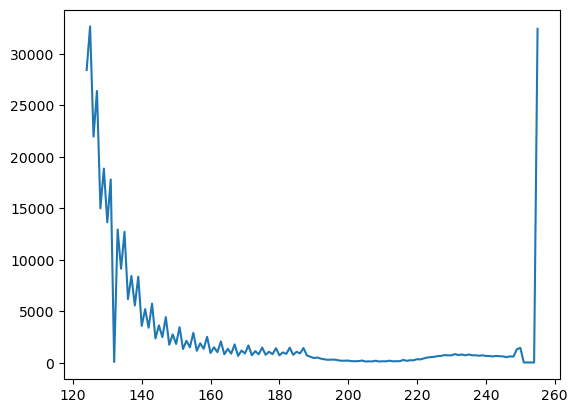

In [94]:

# Exercise 7
A = df.groupby(["FPGA","TDC_CHANNEL"],as_index=False)["TDC_MEAS"].count()
a = np.array(A[A["FPGA"] == 1]["TDC_MEAS"])
A[A["FPGA"] == 1]["TDC_MEAS"].plot()

In [95]:
# Exercise 8
#print("Most Noisy Channels Counts:",np.array(df.groupby(["TDC_CHANNEL"])["TDC_MEAS"].count().sort_values())[-4:-1])
print("Most Noisy Channels")
df.groupby(["TDC_CHANNEL"])["TDC_MEAS"].count().sort_values().tail(3)

Most Noisy Channels


TDC_CHANNEL
63      64642
64      66020
139    108059
Name: TDC_MEAS, dtype: int64

In [96]:
# Exercise 9
print("Number of unique orbits: ", df["ORBIT_CNT"].nunique(1))
F = df.groupby(["TDC_CHANNEL","ORBIT_CNT"],as_index=False)["ORBIT_CNT"].count()
print("Number of orbits with channel 139 in it: ",len(F[F["TDC_CHANNEL"] == 139]))

Number of unique orbits:  11001
Number of orbits with channel 139 in it:  10976
